In [ ]:
##in class of 23 people, what is the probability of at leat two people have same birthday

prob = 1.0
classSize = 23
for i in range(classSize):
    prob = prob * (365-i)/365
print("probability of no shared birthdays = ", prob)
print("probability of atleast 2 shared birthdays = ", 1-prob)

In [ ]:
#Acompany decides to do random drug tests for heroin on their employees.
#They know that 3% of their population uses heroin. The drug test has the following accuracy:
#The test correctly identifies 95% of
#the heroin users (sensitivity) and 90% of the non-users (specificity).

def prob_of_drug(puser,specificity ,sensitivity ):
    prob=(specificity*puser)/((specificity*puser)+(sensitivity*(1-puser)))
    return prob   

In [ ]:
prob_of_drug(0.003, 0.95,0.10)

In [ ]:
#Binomial 
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
from scipy.stats import poisson

n=10
p=0.5
cdf=binom.cdf
x =np.linspace(0,10,20)
%matplotlib inline

plt.plot(x,cdf(x,n,p))
#Title (use y=1.08 to raise the long title a little more above the plot)
plt.title('Binomial Distribution PMF: 1 coin Flips, Odds of Success for Heads is p=0.5',y=1.08)
plt.xlabel('Number of Heads')
plt.ylabel('Probability')


In [ ]:
#bernoli distribution:What is the probability of getting 2 heads out of 10 flips of a fair coin? 
#In this experiment the probability of getting a head is 0.3,
#this means that on an average you can expect 3 coin flips to be heads. 
#I define all the possible values the coin flip can take, k = np.arange(0,21)
from scipy.stats import bernoulli
import numpy
n=10
p=0.3
k=np.arange(0,21)
bernoulli=bernoulli.pmf(k,p,n)
plt.plot(k,bernoulli,'o-')
plt.xlabel('Number of success')
plt.ylabel('Probability of success')
plt.show()


In [ ]:
# poisson distribution
# A random variable X that has a Poisson distribution
# represents the number of events occurring in a fixed time interval with a rate parameters λ.
# λ tells you the rate at which the number of events occur.  The average and variance is λ.
rate=2
n=np.arange(3,11)
y=poisson.pmf(n, rate)
plt.plot(n,y,'o-')
plt.title('Lambda=2')
plt.xlabel('Number of success')
plt.ylabel('probability of success')

In [ ]:
#guassian distribution for 3 mu and sigma (-1, 1), (0, 2), (2, 3)
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

for mu, sig in [(-1, 1), (0, 2), (2, 3)]:
    plt.plot(gaussian(np.linspace(-3, 3, 120), mu, sig))

plt.show()

In [ ]:
##uniform distribution   f(x)=1/a-b
import matplotlib.pyplot as plt
s=np.random.uniform(-10,100,1000)
#count, bins, ignored = plt.hist(s, 15, normed=True)
#plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.plot(s)
plt.show()


In [ ]:
# ##beta distribution
# The beta distribution is a continuous distribution which can take values between 0 and 1.
# This distribution is parameterized by two shape parameters α and β.
#
from scipy.stats import beta
a=0.5
b=0.5
x=np.arange(0.01,1,0.01)
y=beta.pdf(x,a,b)
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.show()

In [2]:

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score

# Importing the dataset
dataset = pd.read_csv('titanic3_homework.csv')
df=dataset.drop(dataset.index[[1309]])

In [51]:
dataset.head(n=5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [52]:
X=df.iloc[:, [0,3,4,8]].values

In [53]:
X[:, 2:4]

array([[29.0, 211.3375],
       [0.9167, 151.55],
       [2.0, 151.55],
       ..., 
       [26.5, 7.225],
       [27.0, 7.225],
       [29.0, 7.875]], dtype=object)

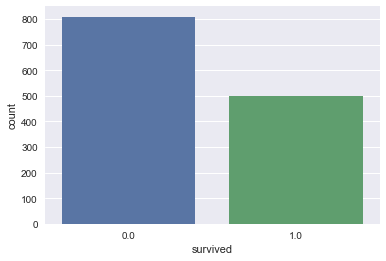

In [55]:
# Figures inline and set visualization style
%matplotlib inline
sns.set()
sns.countplot(x='survived', data=df)
#sns.countplot(x='age', data=df)
#sns.countplot(x='sex', data=df)
#sns.countplot(x='fare', data=df)


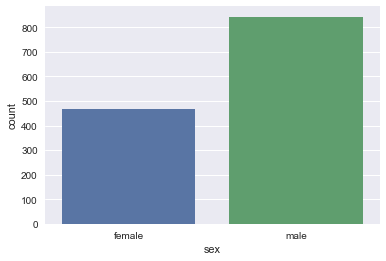

In [18]:
sns.countplot(x='sex', data=df)


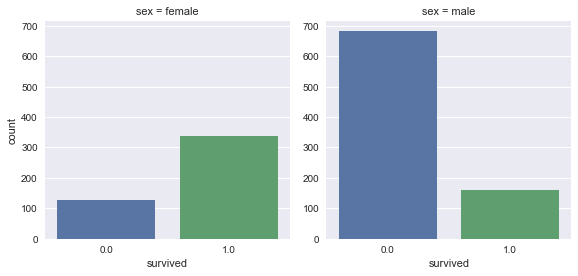

In [56]:
sns.factorplot(x='survived', col='sex', kind='count', data=df)


In [57]:
df.groupby(['sex']).fare.sum()


sex
female    21528.3130
male      22022.1739
Name: fare, dtype: float64

In [58]:
df.groupby(['age']).survived.sum()


age
0.1667      1.0
0.3333      0.0
0.4167      1.0
0.6667      1.0
0.7500      2.0
0.8333      3.0
0.9167      2.0
1.0000      7.0
2.0000      4.0
3.0000      5.0
4.0000      7.0
5.0000      4.0
6.0000      3.0
7.0000      2.0
8.0000      4.0
9.0000      4.0
10.0000     0.0
11.0000     1.0
11.5000     0.0
12.0000     3.0
13.0000     3.0
14.0000     4.0
14.5000     0.0
15.0000     5.0
16.0000     8.0
17.0000     7.0
18.0000    14.0
18.5000     0.0
19.0000    11.0
20.0000     8.0
           ... 
46.0000     0.0
47.0000     3.0
48.0000    10.0
49.0000     5.0
50.0000     6.0
51.0000     3.0
52.0000     3.0
53.0000     4.0
54.0000     5.0
55.0000     4.0
55.5000     0.0
56.0000     2.0
57.0000     0.0
58.0000     4.0
59.0000     1.0
60.0000     4.0
60.5000     0.0
61.0000     0.0
62.0000     2.0
63.0000     2.0
64.0000     2.0
65.0000     0.0
66.0000     0.0
67.0000     0.0
70.0000     0.0
70.5000     0.0
71.0000     0.0
74.0000     0.0
76.0000     1.0
80.0000     1.0
Name: survived, Leng

In [59]:
df.groupby(['sex']).survived.sum()


sex
female    339.0
male      161.0
Name: survived, dtype: float64

In [60]:
print(df[df.sex == 'female'].survived.sum()/df[df.sex == 'female'].survived.count())
print(df[df.sex == 'male'].survived.sum()/df[df.sex == 'male'].survived.count())

0.727467811159
0.190984578885


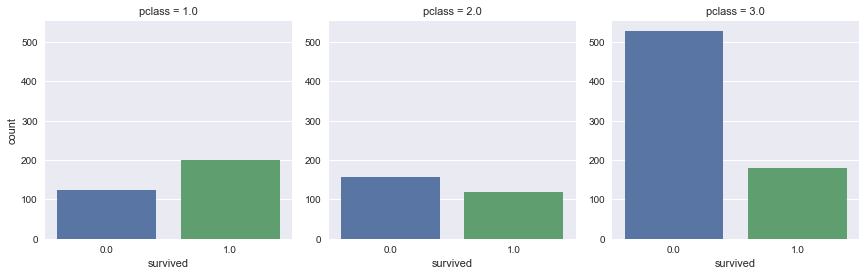

In [61]:
sns.factorplot(x='survived', col='pclass', kind='count', data=df)


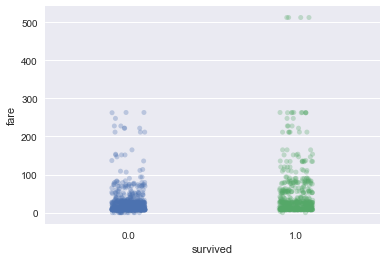

In [62]:
#Plot a strip plot & a swarm plot of 'Fare' with 'Survived' on the x-axis.
sns.stripplot(x='survived', y='fare', data=df, alpha=0.3, jitter=True)

In [ ]:
sns.swarmplot(x='survived', y='fare', data=df)

In [ ]:
#Use the DataFrame method .describe() to check out summary statistics of 'fare' as a function of survival.

df.groupby('survived').fare.describe()


In [23]:
# pair plot is not helping bc som of the column of df is carring NAN : nsns.pairplot(df, hue

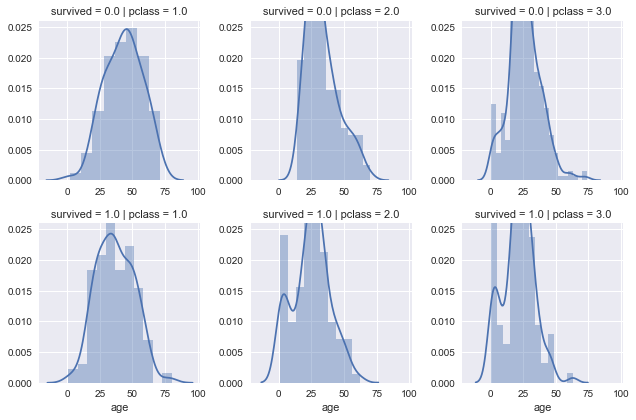

In [80]:
g = sns.FacetGrid(df, row='survived', col='pclass')
g.map(sns.distplot, "age")


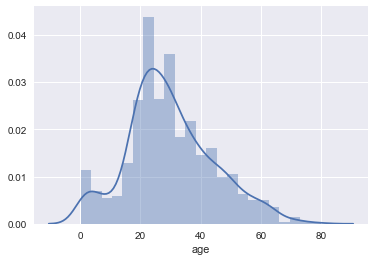

In [71]:
sns.distplot(df.age.dropna())

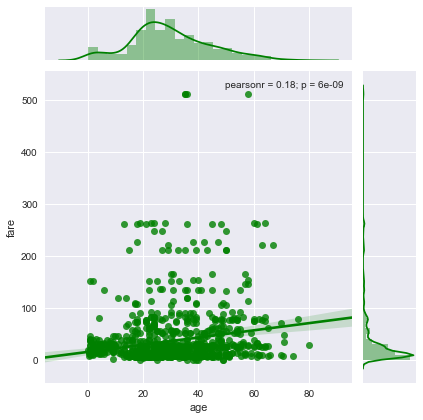

In [72]:
sns.jointplot(data=df, x='age', y='fare', kind='reg', color='g')


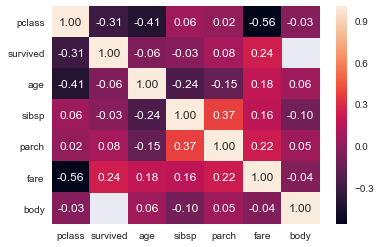

In [73]:
sns.heatmap(df.corr(), annot=True, fmt=".2f")


In [15]:
#create dummies for categorical data 
data = pd.get_dummies(df, columns=['sex'], drop_first=True)

X = data.iloc[:, [0,3,4,7,13]].values
y = data.iloc[:, 1].values


## taking care of missing data
from sklearn.preprocessing import Imputer
imputer=Imputer(missing_values='NaN', strategy='mean', axis=0)
imputer=imputer.fit(X[:, 1:4])
X[:, 1:4]=imputer.transform(X[:, 1:4])



# # ## label endocer to convert categorical data to 0, 1  and OneHotEncoder to create dummy
# from sklearn.preprocessing import LabelEncoder ,OneHotEncoder
# labelencoder_X=LabelEncoder()
# X[:,1]=labelencoder_X.fit_transform(X[:,1])
# onehotencoder=OneHotEncoder(categorical_features=[1])
# X=onehotencoder.fit_transform(X).toarray()


# # # # Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)


# # # # Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# # # Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 42)
classifier.fit(X_train, y_train)

# # # Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred1 = classifier.predict(X_train)
print(classifier.score(X,y))
# # # Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm1 = confusion_matrix(y_train, y_pred1)
print(cm)
print(cm1)



0.64858670741
[[126  18]
 [ 43  75]]
[[568  97]
 [121 261]]


In [16]:
X_test.shape
X_train.shape
y_test.shape
y_train.shape

(1047,)

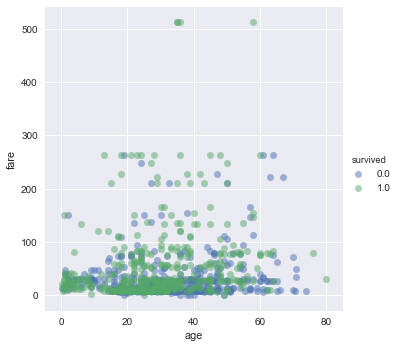

In [75]:
sns.lmplot(x='age', y='fare', hue='survived', data=df, fit_reg=False, scatter_kws={'alpha':0.5})


In [78]:
data.head(5)

,pclass,survived,name,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,sex_male
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",0
1,1.0,1.0,"Allison, Master. Hudson Trevor",0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,0.0,"Allison, Miss. Helen Loraine",2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0


In [77]:
X_test[:,1]

array([ 0.46405999, -0.74891612,  0.05012255,  0.05012255,  0.05012255,
        1.27271073, -0.34459075,  0.14059969,  0.42362745,  0.30232984,
        0.05012255,  0.05012255, -1.23410656,  0.05012255,  0.30232984,
        0.05012255,  0.05012255, -0.26372568,  2.08136146, -0.26372568,
       -0.58718597,  0.30232984, -0.66805105,  0.46405999, -0.58718597,
       -1.63843193,  1.19184565,  1.27271073, -0.42545582,  2.32395669,
        0.05973462, -2.31230485,  0.05012255,  1.43444087, -0.99151134,
       -0.10199553,  0.62579014,  0.54492506,  0.78752028,  0.05012255,
        0.22146477, -0.82978119,  1.0301155 , -0.26372568, -1.07237641,
        0.05012255,  0.2618973 , -0.91064627, -0.1828606 , -0.58718597,
        0.94925043,  0.05012255,  1.83876624,  2.80914713, -0.74891612,
       -0.82978119,  2.80914713,  0.54492506,  0.05973462, -0.42545582,
       -0.5063209 , -0.26372568,  0.54492506, -0.82978119,  0.14059969,
        1.0301155 ,  2.48568683,  3.29433757, -0.82978119, -1.07

In [76]:
df.isnull().any(axis=0)


pclass       False
survived     False
name         False
sex          False
age           True
sibsp        False
parch        False
ticket       False
fare          True
cabin         True
embarked      True
boat          True
body          True
home.dest     True
dtype: bool

In [23]:
import matplotlib.pyplot as plt
-
plt.plot(y_test, y_pred)

In [ ]:
#### prediction line and actual result 

In [ ]:
### how can i show region bloundary line 
